### A tweet with label ‘0’(not sexist/non racist) is of positive sentiment while a tweet with label ‘1’(sexist/racist) is of negative sentiment.

### tweet & id --- tweets collected from various sources and id associated with that tweets

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

In [2]:
train_data = pd.read_csv("https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv")

In [3]:
# print(train_data.shape)
# train_data.head()
train_data.to_csv("tweet_train_data.csv", index=False, encoding='utf-8')

In [5]:
test_data = pd.read_csv("https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/test.csv")
test_data.to_csv("tweet_test_data.csv", index=False, encoding='utf-8')

In [26]:
print(test_data.shape)
test_data.head()

(17197, 2)


,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [6]:
dataset = train_data.append(test_data,ignore_index=True)
dataset.tail()              #here we have no label in test that's why we have NAN value.

,id,label,tweet
49154,49155,NaN,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,"happy, at work conference: right mindset leads..."
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze ..."


####  Remove unwanted text patterns from the tweets (@User)

In [7]:
import re

def remove_pattern(text, pattern):
     
    pattern_lists = re.findall(pattern,text)  #find pattern in text if in 
    
    for i in pattern_lists:
        text = re.sub(i,"", text)   #here i is our pattern which replace by space 
    
    return text
    

In [8]:
dataset['new_tweet'] = np.vectorize(remove_pattern)(dataset['tweet'], "@[\w]*")
dataset.head()


,id,label,tweet,new_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [9]:
#just for example to demonstrate how it works

# l = ["@umang#,@patel,umang@patel","@patel @idiot@ PATEL"]
# np.vectorize(remove_pattern)(l,"@[\w]*")

#### Remove Punctuation, Numbers, and Special Characters

Here we will replace everything except characters and hashtags with spaces.


In [10]:
dataset['new_tweet'] = dataset['new_tweet'].str.replace("[^a-zA-Z#]"," ")
dataset.head()

,id,label,tweet,new_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


#### Remove short words like (a, ,the, oh, hmm)   ----------> Stop Words

In [11]:
#basically thier length is less than or equal 3

dataset['new_tweet'] = dataset['new_tweet'].apply(lambda x: ' '.join([word for word in x.split() if len(word)>3]))
dataset.head()   #as you see first tweet(a,is,and) words are remove 

,id,label,tweet,new_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


#### Tokenization  ---- seprate sentence into words which konwn as tokens


In [12]:
tokens_of_tweet= dataset['new_tweet'].apply(lambda x:x.split())

#### (stemming) --- strip("ing, ly, s, es") from wrod
Ex. drink, drinks, drinking --- one word drink

In [13]:
from nltk import PorterStemmer

pos = PorterStemmer()

tokens_of_tweet = tokens_of_tweet.apply(lambda x:[pos.stem(i) for i in x])
tokens_of_tweet      #remove all suffix

0        [when, father, dysfunct, selfish, drag, kid, i...
1        [thank, #lyft, credit, caus, they, offer, whee...
2                                  [bihday, your, majesti]
3                         [#model, love, take, with, time]
4                             [factsguid, societi, #motiv]
                               ...                        
49154    [thought, factori, left, right, polaris, #trum...
49155    [feel, like, mermaid, #hairflip, #neverreadi, ...
49156    [#hillari, #campaign, today, #ohio, use, word,...
49157    [happi, work, confer, right, mindset, lead, cu...
49158    [song, glad, free, download, #shoegaz, #newmus...
Name: new_tweet, Length: 49159, dtype: object

In [14]:
for i in range(len(tokens_of_tweet)):
    tokens_of_tweet[i] = ' '.join(tokens_of_tweet[i])
    
dataset['new_tweet'] = tokens_of_tweet
dataset.head()

,id,label,tweet,new_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


In [15]:
# d = ['umang','when','he','arrive','he','was','late']
# d1=(lambda d:' '.join(d))
# d1(d)
dataset.to_csv("tweetdata_analysis.csv", index=False, encoding="utf-8")

## Data Visualisation

### We use WordCloud 
--- Most Frequent word large in size & Less Frequent word small in size


In [143]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

In [155]:
positive_words = ' '.join(row_text for row_text in dataset['new_tweet'][dataset['label']==0])

In [163]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(positive_words)


In [170]:
print(Mask.shape)

(926, 1139, 4)


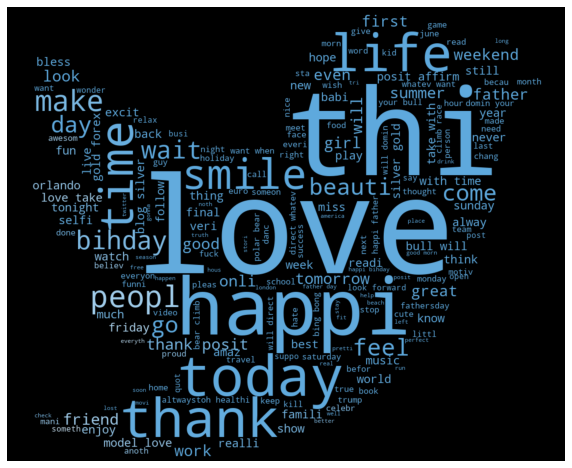

In [176]:
# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color & recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

In [186]:
# plt.figure(figsize=(10,20))
# plt.imshow(wc)

In [180]:
negative_words = ' '.join(row_text for row_text in dataset['new_tweet'][dataset['label']==1])

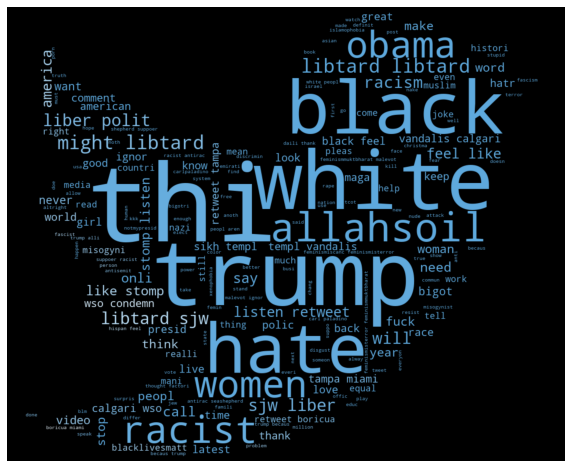

In [184]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

image_colors = ImageColorGenerator(Mask)
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(negative_words)
plt.figure(figsize=(10,20))
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")
plt.axis('off')
plt.show()

### Extract #words from dataset and see which category it belongs

In [197]:
def extract_hash_word(pd_series):
    
    hash_words = []
    for row in pd_series:
        
        h_w= re.findall(r'#(\w+)',row)  #it returns all words list
        hash_words.append(h_w)
    return hash_words
        

In [198]:
postive_hash_words = extract_hash_word(dataset.loc[dataset.label==0,'new_tweet'])
postive_hash_words

[['run'],
 ['lyft', 'disapoint', 'getthank'],
 [],
 ['model'],
 ['motiv'],
 ['allshowandnogo'],
 [],
 ['school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl'],
 ['allin', 'cav', 'champion', 'cleveland', 'clevelandcavali'],
 [],
 ['ireland', 'blog', 'silver', 'gold', 'forex'],
 ['orlando',
  'standwithorlando',
  'pulseshoot',
  'orlandoshoot',
  'biggerproblem',
  'selfish',
  'heabreak',
  'valu',
  'love'],
 ['gettingf'],
 ['got', 'junior', 'yugyoem', 'omg'],
 ['thank', 'posit'],
 ['friday', 'cooki'],
 [],
 ['euro'],
 ['badday', 'coneofsham', 'cat', 'piss', 'funni', 'laugh'],
 ['wine', 'weekend'],
 ['tgif', 'gamedev', 'indiedev', 'indiegamedev', 'squad'],
 ['upsideofflorida', 'shopalyssa', 'love'],
 ['smile', 'media', 'pressconfer', 'antalya', 'turkey', 'throwback'],
 ['ica'],
 [],
 ['rip', 'orlando'],
 [],
 ['alohafriday', 'time', 'not', 'exist', 'positivevib', 'hawaiian'],
 [],
 ['goodnight', 'badmonday'],
 ['taylorswift'],
 ['travelingram', 'dalat', 'ripinkyli

In [199]:
postive_hash_words_unlist = sum(postive_hash_words, [])
postive_hash_words_unlist

['run',
 'lyft',
 'disapoint',
 'getthank',
 'model',
 'motiv',
 'allshowandnogo',
 'school',
 'exam',
 'hate',
 'imagin',
 'actorslif',
 'revolutionschool',
 'girl',
 'allin',
 'cav',
 'champion',
 'cleveland',
 'clevelandcavali',
 'ireland',
 'blog',
 'silver',
 'gold',
 'forex',
 'orlando',
 'standwithorlando',
 'pulseshoot',
 'orlandoshoot',
 'biggerproblem',
 'selfish',
 'heabreak',
 'valu',
 'love',
 'gettingf',
 'got',
 'junior',
 'yugyoem',
 'omg',
 'thank',
 'posit',
 'friday',
 'cooki',
 'euro',
 'badday',
 'coneofsham',
 'cat',
 'piss',
 'funni',
 'laugh',
 'wine',
 'weekend',
 'tgif',
 'gamedev',
 'indiedev',
 'indiegamedev',
 'squad',
 'upsideofflorida',
 'shopalyssa',
 'love',
 'smile',
 'media',
 'pressconfer',
 'antalya',
 'turkey',
 'throwback',
 'ica',
 'rip',
 'orlando',
 'alohafriday',
 'time',
 'not',
 'exist',
 'positivevib',
 'hawaiian',
 'goodnight',
 'badmonday',
 'taylorswift',
 'travelingram',
 'dalat',
 'ripinkylif',
 'photoshop',
 'enoughisenough',
 'dontph

In [206]:
positive_word_freq = nltk.FreqDist(postive_hash_words_unlist)
positive_word_freq

FreqDist({'love': 1654, 'posit': 917, 'smile': 676, 'healthi': 573, 'thank': 534, 'fun': 463, 'life': 425, 'affirm': 423, 'summer': 390, 'model': 375, ...})

In [224]:
# list(positive_word_freq.keys())[:2]
# list(positive_word_freq.values()[:2])

In [226]:
positive_word_df = pd.DataFrame({'Word_hashtag':list(positive_word_freq.keys()),'Count':list(positive_word_freq.values())})
positive_word_df

,Word_hashtag,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375
...,...,...
19490,kamp,1
19491,ucsd,1
19492,berlincitygirl,1
19493,genf,1


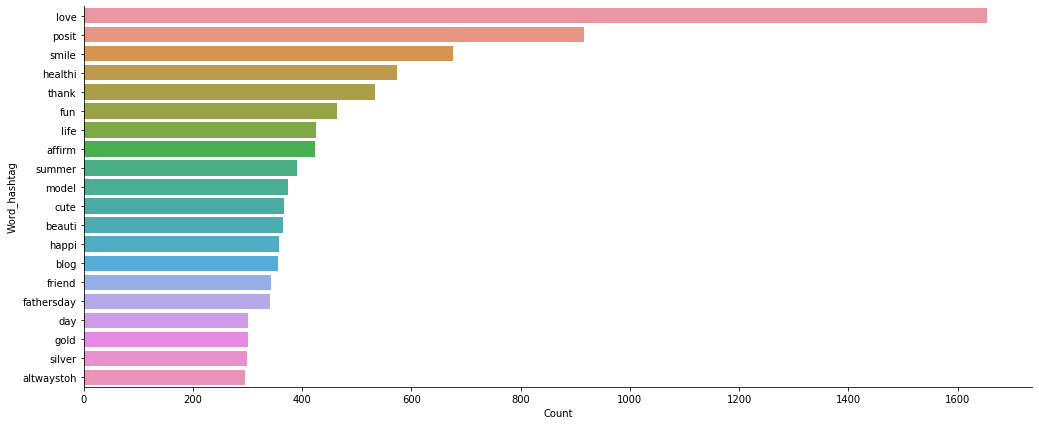

In [234]:
#create a bar plot with 20 most frequent word

df_most_20 = positive_word_df.sort_values(by='Count',ascending=False)[:20]
# df_most_20 = positive_word_df.nlargest(20,columns='Count')
plt.figure(figsize=(17,7))
sns.barplot(x='Count', y='Word_hashtag', data=df_most_20)
sns.despine()

In [201]:
negative_hash_words = extract_hash_word(dataset.loc[dataset.label==1,'new_tweet'])
postive_hash_words

negative_hash_words_unlist = sum(negative_hash_words, [])
negative_hash_words_unlist

['cnn',
 'michigan',
 'tcot',
 'australia',
 'opkillingbay',
 'seashepherd',
 'helpcovedolphin',
 'thecov',
 'helpcovedolphin',
 'neverump',
 'xenophobia',
 'love',
 'peac',
 'race',
 'ident',
 'med',
 'altright',
 'whitesupremaci',
 'linguist',
 'race',
 'power',
 'raciolinguist',
 'brexit',
 'peopl',
 'trump',
 'republican',
 'michelleobama',
 'knick',
 'golf',
 'jewishsupremacist',
 'libtard',
 'sjw',
 'liber',
 'polit',
 'trash',
 'hate',
 'stereotyp',
 'prejudic',
 'hope',
 'hate',
 'conflict',
 'pol',
 'bluelivesmatt',
 'draintheswamp',
 'ferguson',
 'antisemit',
 'hocoschool',
 'columbiamd',
 'hocomd',
 'nazi',
 'hatr',
 'bigotri',
 'libtard',
 'sjw',
 'liber',
 'polit',
 'fyi',
 'tcot',
 'topoli',
 'blacklivesmatt',
 'ushistori',
 'eugen',
 'biher',
 'bigotri',
 'altright',
 'potu',
 'theresist',
 'crime',
 'offic',
 'black',
 'retweet',
 'tampa',
 'miami',
 'allahsoil',
 'prais',
 'cleveland',
 'rnc',
 'white',
 'tamirric',
 'rip',
 'bigot',
 'blacklivesmatt',
 'feminismiscanc

In [237]:
negative_word_freq = nltk.FreqDist(negative_hash_words_unlist)
negative_word_freq


#create a bar plot with 20 most frequent word



FreqDist({'trump': 136, 'polit': 95, 'allahsoil': 92, 'liber': 81, 'libtard': 77, 'sjw': 75, 'retweet': 63, 'black': 46, 'miami': 46, 'hate': 37, ...})

In [238]:
negative_word_df = pd.DataFrame({'Word_hashtag':list(negative_word_freq.keys()),'Count':list(negative_word_freq.values())})
negative_word_df


,Word_hashtag,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5
...,...,...
1714,jumpedtheshark,1
1715,freemilo,5
1716,milo,4
1717,mailboxprid,1


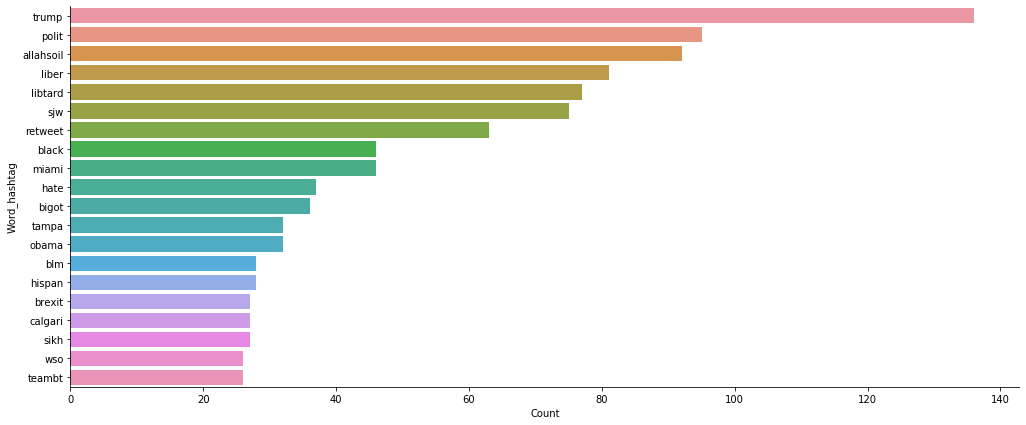

In [239]:
df_most_20 = negative_word_df.sort_values(by='Count',ascending=False)[:20]
# df_most_20 = negative_word_df.nlargest(20,columns='Count')
plt.figure(figsize=(17,7))
sns.barplot(x='Count', y='Word_hashtag', data=df_most_20)
sns.despine()

###  Bag of Words[Vocalbulary]

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:



#here min_df = 2 means only contains token(term) which atleast apperas in document and same as max_df 90% documents
#max_features is most 1000 tokens ordered by token frequency across the corpus.

bow_cv = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english') 

bow_cv.fit(dataset['new_tweet'])             #here we fit with all tweets [train + test] and here our vocabulary ready

bow_dtm = bow_cv.transform(dataset['new_tweet'])


In [19]:
# bow_cv.get_feature_names()

bow_matrix = pd.DataFrame(bow_dtm.todense())
bow_matrix

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF model 

In [24]:
tfidf_cv = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf_cv.fit(dataset['new_tweet'])                         

tfidf_dtm = tfidf_cv.transform(dataset['new_tweet'])


In [28]:
#create DF

tfidf_matrix = pd.DataFrame(tfidf_dtm.todense())
tfidf_matrix

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### We have one dataset with features from the Bag-of-Words model and another dataset with features from            TF-IDF model.

In [32]:
bow_train_dtm = bow_dtm[0:31962]
bow_train_dtm.todense()

(31962, 1000)

In [34]:
tfidf_train_dtm = tfidf_dtm[0:31962]
tfidf_train_dtm.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [35]:
from sklearn.model_selection import train_test_split

X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(bow_train_dtm, train_data['label'], test_size=0.3, random_state=0)


In [36]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_train_dtm, train_data['label'], test_size=0.3, random_state=1)

### Different Machine Learning Algorithms

#### Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [43]:
logreg = LogisticRegression(solver='lbfgs', random_state=10)

#fit our model
logreg.fit(X_train_bow, y_train_bow)

#pred prob of targett(label)

bow_label_proba = logreg.predict_proba(X_test_bow)
bow_label_proba   #1st col label 0 and 2nd col label 1

array([[9.96507669e-01, 3.49233062e-03],
       [9.85610864e-01, 1.43891360e-02],
       [9.99044840e-01, 9.55159662e-04],
       ...,
       [9.77980017e-01, 2.20199829e-02],
       [9.96660933e-01, 3.33906674e-03],
       [9.92960302e-01, 7.03969752e-03]])

In [59]:
y_pred_bow = logreg.predict(X_test_bow)
f1_score(y_test_bow,y_pred_bow)   #0.50
# confusion_matrix(y_test_bow,y_pred_bow)   #here u can see our data is imbalanced

0.5031446540880503

In [77]:
#if proba is atleast 0.3 than label 1 means it's work like thresold

pred_bow_negative_bool = bow_label_proba[:,1] >= 0.3

#convert to int
pred_bow_negative_int = pred_bow_negative_bool.astype(np.int)

f1_bow = f1_score(y_test_bow, pred_bow_negative_int)
f1_bow         #0.52


0.5294635004397537

In [61]:
logreg.fit(X_train_tfidf, y_train_tfidf)

tfidf_label_proba = logreg.predict_proba(X_test_tfidf)
y_pred_tfidf = logreg.predict(X_test_tfidf)

In [89]:
#and we can do same as we did for bow
f1_tfidf = f1_score(y_test_tfidf, y_pred_tfidf)
f1_tfidf


0.4637362637362637

#### Decision Tree

In [65]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='entropy', random_state=1)

In [67]:
dtc.fit(X_train_bow, y_train_bow)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [68]:
dtc_bow_label_proba = dtc.predict_proba(X_test_bow)
dtc_bow_label_proba

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       ...,
       [0.90909091, 0.09090909],
       [1.        , 0.        ],
       [1.        , 0.        ]])

In [73]:
dtc_pred_bow_negative_bool = dtc_bow_label_proba[:,1] >= 0.3

#convert to int
dtc_pred_bow_negative_int = dtc_pred_bow_negative_bool.astype(np.int)

dct_f1_bow = f1_score(y_test_bow, dtc_pred_bow_negative_int)
dct_f1_bow         #0.47


0.47218788627935726

In [74]:
dtc.fit(X_train_tfidf, y_train_tfidf)

dtc_tfidf_label_proba = dtc.predict_proba(X_test_tfidf)

dtc_pred_tfidf_negative_bool = dtc_tfidf_label_proba[:,1] >= 0.3

#convert to int
dtc_pred_tfidf_negative_int = dtc_pred_tfidf_negative_bool.astype(np.int)

dct_f1_tfidf = f1_score(y_test_tfidf, dtc_pred_tfidf_negative_int)
dct_f1_tfidf        #0.51


0.5137318255250404

### Comparing two model scores

In [109]:
Alog_bow = ['LogReg', 'Decision Tree']

values = [f1_bow, dct_f1_bow]

model_compare = pd.DataFrame({'Model':Alog_bow, 'F1_Score':values},index=np.arange(1,3))
model_compare

,Model,F1_Score
1,LogReg,0.529464
2,Decision Tree,0.472188


In [113]:
Alog_tfidf = ['LogReg', 'Decision Tree']

values = [f1_tfidf, dct_f1_tfidf]

model_compare_1 = pd.DataFrame({'Model':Alog_tfidf, 'F1_Score':values},index=np.arange(1,3))
model_compare_1.T

,1,2
Model,LogReg,Decision Tree
F1_Score,0.463736,0.513732


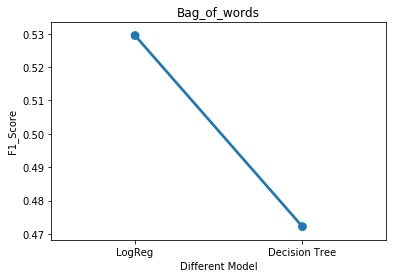

In [112]:
plt.figure(figsize=(17,7))
%matplotlib inline
sns.pointplot(y='F1_Score', x='Model', data=model_compare)
plt.ylabel('F1_Score')
plt.xlabel('Different Model')
plt.title('Bag_of_words')
plt.show()


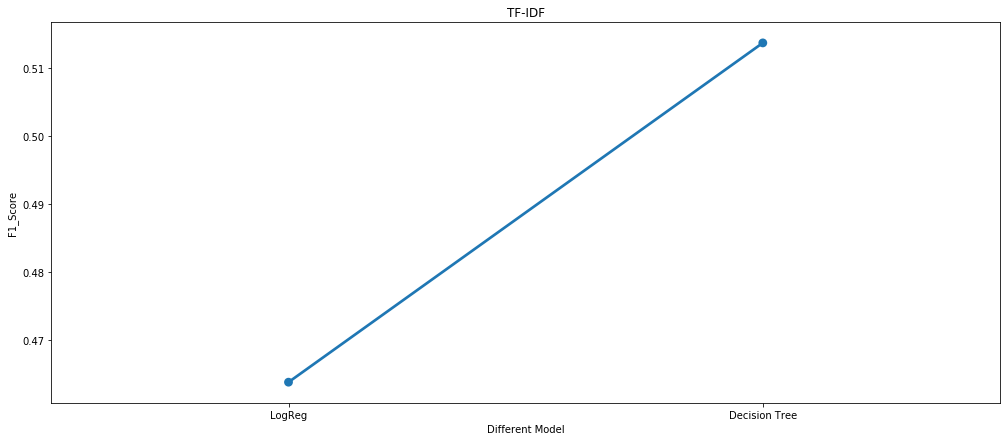

In [114]:
plt.figure(figsize=(17,7))

sns.pointplot(y='F1_Score', x='Model', data=model_compare_1)
plt.ylabel('F1_Score')
plt.xlabel('Different Model')
plt.title('TF-IDF')
plt.show()

In [ ]:
#we get best score by LogReg using Bag of words features

In [137]:
test_bow = bow_dtm[31962:]
test_pred = logreg.predict_proba(test_bow)

test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)

test_data['label'] = test_pred_int

test_data_1 = test_data[['id','label']]  #here we found all the labels
test_data_1


,id,label
0,31963,0
1,31964,1
2,31965,0
3,31966,0
4,31967,0
...,...,...
17192,49155,1
17193,49156,0
17194,49157,1
17195,49158,0
